In [1]:
import os 
from matplotlib import markers, pyplot as plt
import numpy as np


Bad key "text.kerning_factor" on line 4 in
/root/miniconda3/envs/vamb/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
def parser_loss(file,idx):
    loss_ ,avg_loss_,lr_ = [],[],[]

    with open(file,"r") as f :
        for line in f.readlines():
            _ = line.strip().split(":")
            # assert len(_) == 6
            # if idx == 5 or idx == 7:
            loss_.append(round(float( _[3].strip()),4))
            avg_loss_.append(round(float( _[-3].strip()),4))
            lr_ .append(float(_[-1]))
            # else:
            #     loss_.append(round(float( _[1].strip("Loss ")),4))
            #     avg_loss_.append(round(float( _[3].strip()),4))
            #     lr_ .append(float(_[-1]))

    return loss_,avg_loss_,lr_

def plot_loss(dir,filename):
    ''' loss格式:
        train Epoch id : Loss 数值：Avg Loss : 数值 ：lr : 数值
    '''
    file = os.path.join(dir,filename)
    loss_,avg_loss_,lr_ = parser_loss(file)
    x = np.arange(len(loss_))
    plt.plot(x,loss_,color="blue",alpha=0.8)
    plt.plot(x,avg_loss_,color="green",alpha=0.8)
    # plt.plot(x,lr_,color="blue")  
    

In [3]:
def cac_avg_loss(file,idx,cnt = 400):

   loss_,avg_loss_,lr_ = parser_loss(file,idx) 
   pre_avg_loss_  = 0
   after_avg_loss_ = 0
   length = len(avg_loss_)
   for i in range(0,cnt):
      pre_avg_loss_ += avg_loss_[i]
   
      after_avg_loss_ += avg_loss_[length-i-1]
   
   avg_loss_ = []
   
   print("corpus {} training loss is from {} to {}".format(idx,pre_avg_loss_/cnt,after_avg_loss_/cnt))



def run(dir,filename):
   for i in range(3,8):
      path = os.path.join(dir,"corpus"+str(i)+filename)
      cac_avg_loss(path,i)
   

In [63]:
run("/workspace/vamb-data/1229fa/")

corpus 3 training loss is from 2.5567354999999967 to 14.24135225000001
corpus 4 training loss is from 3.8099795 to 0.5869432499999958
corpus 5 training loss is from 5.48041025 to 0.7341210000000011
corpus 6 training loss is from 7.825976000000001 to 0.8861277499999949
corpus 7 training loss is from 10.656751249999996 to 1.0613999999999952


In [69]:
run("/workspace/vamb-data/1229fa/","/model_params_bs_8sl_512/0330_768.log")


corpus 3 training loss is from 2.9388957500000026 to 0.5251612499999968
corpus 4 training loss is from 3.356043000000003 to 0.6195597499999973
corpus 5 training loss is from 4.795778249999998 to 0.7402502499999964
corpus 6 training loss is from 10.315349999999993 to 0.9687410000000005
corpus 7 training loss is from 10.385217500000001 to 1.378606750000001


In [70]:
run("/workspace/vamb-data/1229fa/","/model_params_bs_8sl_512/0320_256.log")

corpus 3 training loss is from 3.201203749999998 to 0.465497000000001
corpus 4 training loss is from 4.788928250000003 to 3.1010754999999985
corpus 5 training loss is from 6.667613250000008 to 0.750499999999994
corpus 6 training loss is from 8.714296499999994 to 4.2189912500000295
corpus 7 training loss is from 11.141705249999994 to 2.018950250000002


In [57]:
def main(dir,fs=34):
    '''
    512:/model_params_bs_8sl_512/log.txt
    256:/model_params_bs_8sl_512/0320_256.log
    768:/model_params_bs_8sl_512/0330_768.log
    '''
    avg_losses = []
    losses = []

    min_length = 20000
    for i in range(3,8):
        path = os.path.join(dir,"corpus"+str(i)+"/model_params_bs_8sl_512/0330_768.log")

        loss_,avg_loss_,lr_ = parser_loss(path,i)
        # avg_loss_,loss_,lr_ = parser_loss(path,i)


        avg_losses.append(avg_loss_)

        losses.append(loss_)
        
        if len(avg_loss_) < min_length:
            min_length = len(avg_loss_)
    
    nline = len(avg_losses)
    colors = ["blue","orange","green","red","gray"]
    print(min_length)
    x = np.arange(min_length)
    fig = plt.figure(figsize=(8,7))

    for idx,avg_loss_ in enumerate(avg_losses):
        plt.plot(x,avg_loss_[:min_length],color = colors[idx])
    

    plt.legend(["3mer","4mer","5mer","6mer","7mer"],fontsize=24)
    plt.rcParams.update({"font.size":fs})
    plt.xlabel("batch",fontsize=fs)
    plt.ylabel("average loss",fontsize=fs)
    plt.xticks(range(0,20000+1,5000),fontsize=fs)
    plt.yticks(range(0,13,2),fontsize=fs)


    plt.title("ContigBERT Training loss(H=768,L=12,A=8)",fontsize=24)

    plt.savefig("./768_kmerloss.png",dpi=600)

20000


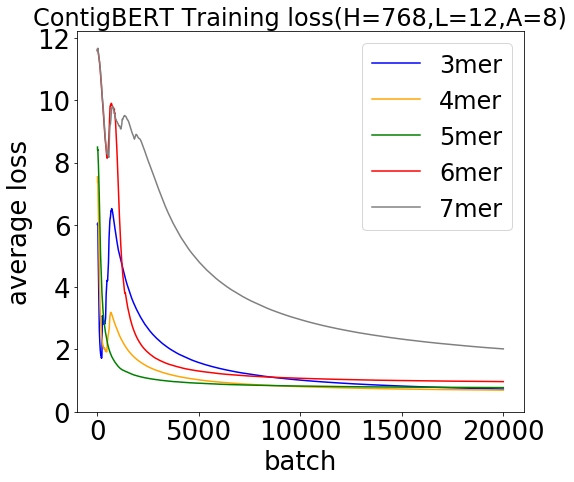

In [58]:
main("/workspace/vamb-data/1229fa/",fs=26)

In [7]:
def find_loss(dir):
    filenames = os.listdir(dir)
    def parser(file):
        with open(file,'r') as f:
            try:
                lines = f.readlines()     
            except :
                print("error")
            else:   
                if len(lines) > 1e4 and len(lines[0].split(":")) <= 12:
                    print(lines[0])
                    print("doc_length:{},doc:{}".format(len(lines),file))
            

    for name in filenames:
        path = os.path.join(dir,name)
        parser(path)


In [6]:
find_loss("/workspace/logdir/")

test Epoch 0 : Loss : 0.1071 : Avg Loss : 0.1071 : lr : 0.000001000 : acc : 0.00

doc_length:28991,doc:/workspace/logdir/2021_11_22_01_58_03.log
test Epoch 0 : Loss : 0.1032 : Avg Loss : 0.1032 : lr : 0.000001000 : acc : 0.00

doc_length:28991,doc:/workspace/logdir/2021_11_21_14_01_23.log
error
train Epoch 0 : Loss : 1198.1387 : Avg Loss : 1198.1387 : lr : 0.003000000 : acc : 0.00

doc_length:31077,doc:/workspace/logdir/2021_11_20_08_06_12.log
train Epoch 0 : Loss : 15.8920 : Avg Loss : 15.8920 : lr : 0.000001000 : acc : 0.00

doc_length:562631,doc:/workspace/logdir/2021_11_20_13_38_50.log
train Epoch 0 : Loss : 1320.0217 : Avg Loss : 1320.0217 : lr : 0.003000000 : acc : 0.00

doc_length:80947,doc:/workspace/logdir/2021_11_20_07_27_37.log
error
train Epoch 0 : Loss : 16.1459 : Avg Loss : 16.1459 : lr : 0.000001000 : acc : 0.00

doc_length:35539,doc:/workspace/logdir/2021_11_20_12_48_22.log
test Epoch 0 : Loss : 0.1162 : Avg Loss : 0.1162 : lr : 0.000001000 : acc : 0.00

doc_length:2899

In [7]:
dir = "/workspace/vamb-data/1229fa/"
filename = "corpus3/model_params_bs_8sl_512/0214-3mer-0.0001.log"
plot_loss(dir,filename)

TypeError: parser_loss() missing 1 required positional argument: 'idx'

In [8]:
dir = "/workspace/vamb-data/1229fa/"
filename = "corpus4/model_params_bs_8sl_512/0214-4mer-0.0001.log"
plot_loss(dir,filename)

TypeError: parser_loss() missing 1 required positional argument: 'idx'

In [ ]:
dir = "/workspace/vamb-data/1229fa/"
filename = "corpus5/model_params_bs_8sl_512/0214-5mer-0.001.log"
plot_loss(dir,filename)

In [ ]:
dir = "/workspace/"
filename = "newest.log"
plot_loss(dir,filename)


In [ ]:
dir = "/workspace/vamb-data/1229fa/"
filename = "corpus7/model_params_bs_8sl_512/0214-7mer-0.001.log"
plot_loss(dir,filename)